Starting Point: EDA and some data cleansing.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('customer_segmentation.csv')
#df.info()
df.head() 
#df.describe()                     #no nulls hence no need to impute/delete some rows except for duplicate
#col = list(df.columns)
#print(col)




,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery


Now we want to see which columns contains categorical values, so that we will be able to use OneHotEncoder on those columns

In [32]:
#Checking the features that are categorical

categorical_features = df.select_dtypes(include='O').keys()

#Displaying those features

categorical_features

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'customer_unique_id', 'customer_city', 'customer_state',
       'product_id', 'seller_id', 'shipping_limit_date', 'seller_city',
       'seller_state', 'product_category_name',
       'product_category_name_english'],
      dtype='object')

We want to use OneHotEncoder only on the unique features, because otherwise we would get a non-sense giant dataset with thousands of columns.

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders.one_hot import OneHotEncoder


### Categorical data to be converted to numeric data
categorical_cols = ['order_status','payment_type', 'customer_city', 'customer_state', 'seller_city','seller_state', 'product_category_name','product_category_name_english']

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(label_encoded)

dff = pd.DataFrame(onehot_encoded, columns= onehot_encoder.categories)

dff.head()




ModuleNotFoundError: No module named 'category_encoders'

RFM analysis: RFM stands for Frequency (The frequency of purchases of a customer), Recency (How long has been since the last purchace of a customer), Monetary (How much a customer has spent). We will firstly calculate the frequency and generate a new dataset containg 2 columns (CustomerName and Frequency).

In [9]:
frequency_df = df.groupby(
    by=['customer_id'], as_index=False)['order_purchase_timestamp'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,001051abfcfdbed9f87b4266213a5df1,3
1,0013cd8e350a7cc76873441e431dd5ee,1
2,0015bc9fd2d5395446143e8b215d7c75,1
3,0018c09f333634ca9c80d9ff46e43e9c,1
4,001df1ee5c36767aa607001ab1a13a06,1


Creating the monetary dataset:

In [ ]:
#code here

The dataframe does not present missing data, so no data imputation is needed. Even if the describe method has already provided this info, we nevertheless check for some null entries and some duplicates; another important thing is to see whether some customers have made multiple orders and if so, look for the customers' orders distribution by drawing a simple(but effective) histogram.

ValueError: x and y must have same first dimension, but have shapes (13801,) and (11247,)

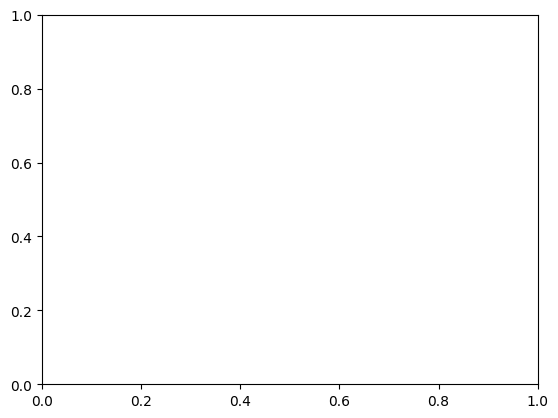

In [9]:
df.isnull()
orderdistr = df.groupby(['customer_unique_id'])['customer_unique_id'].count().reset_index(name='N.orders').sort_values(['N.orders'], ascending = False)
x = [i for i in range(len(df.index))]
y = orderdistr['N.orders']
plt.plot(x, y)

As we can clearly see by looking at the head of the dataframe as well as at the columns, there are multiple attributes in which we are not interested at all: it is them important to identify those which can distinguish consumer behaviour: let us try with 

In [10]:
df2 = df.iloc[:,[11,12,10,9,18,22,14]]
df2.drop_duplicates(inplace = True)
df2.shape


C:\Users\Tommy\AppData\Local\Temp\ipykernel_6296\1602337437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace = True)


(13702, 7)

What we can do now is to understand the distribution of the customers and how often they purchased. The group by function is grouping by the number of purchases and shows it in a different column!

In [12]:
n_orders = df2.groupby(['customer_unique_id'])['customer_unique_id'].count().reset_index(name='N.orders').sort_values(['N.orders'], ascending = False)

Below we perform some data visualization to understand the distribution of the order and customers' ID, as we are eager to see if some customers have made constant orders.

In [22]:
df2.rename(columns= {
    'customer_unique_id': 'Id',
    'payment_value' : 'totpayorder',
    'payment_installments' : 'installments',
    'order_item_id': 'nitems',
    }, inplace = True)

#check for unique id
print(df2.shape,'vs', df2['Id'].nunique())
df2.head()

(13702, 7) vs 11247


,Id,customer_city,totpayorder,installments,price,product_category_name,nitems
0,af07308b275d755c9edb36a90c618231,barreiras,141.46,1,118.7,perfumaria,1
1,8b8028d453a01986b48c4271cc341475,ituverava,135.82,5,116.9,perfumaria,1
2,3edcab192482e9871c17b34cf98c3996,ribeirao das neves,128.04,1,118.7,perfumaria,1
3,958ac7760e5484df1496ba5833ab6117,gaspar,279.30,2,116.9,perfumaria,1
4,958ac7760e5484df1496ba5833ab6117,gaspar,279.30,2,116.9,perfumaria,2
